#### Datasets Preparation:

 - Data Cleaning: Remove or impute missing values, particularly in the 'price' column and other critical features like 'room_type', 'bedrooms', 'bathrooms', and 'location'.
 - Feature Encoding: Convert categorical variables into numerical format using one-hot encoding or label encoding for features like 'room_type'.
 - Feature Scaling: While Random Forest does not require feature scaling, ensuring numerical features are on a similar scale can help with model interpretability.
 - Data Splitting: Split the data into training (70%), validation (15%), and test sets (15%).

#### Experimental Design:
 - Use the training set for model training and the validation set for hyperparameter tuning.
 - Evaluate model performance on the test set using RMSE and MAE.

In [1]:
import pandas as pd

# Load the datasets
madrid_df = pd.read_csv('datasets/madrid_listings.csv')
ny_df = pd.read_csv('datasets/newyorkcity_listings.csv')
singapore_df = pd.read_csv('datasets/singapore_listings.csv')

# Checking the first few rows of each dataset to understand their structure
madrid_head = madrid_df.head()
ny_head = ny_df.head()
singapore_head = singapore_df.head()

(madrid_head, ny_head, singapore_head)

C:\Users\Devon Murray\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


(      id                                      name    host_id host_name  \
 0   6369  Rooftop terrace room ,  ensuite bathroom      13660     Simon   
 1  21853                      Bright and airy room      83531     Abdel   
 2  23001         Apartmento Arganzuela- Madrid Rio      82175     Jesus   
 3  24805                    Gran Via Studio Madrid  346366726         A   
 4  26825        Single Room whith private Bathroom     114340  Agustina   
 
   neighbourhood_group   neighbourhood  latitude  longitude        room_type  \
 0           Chamartín  Hispanoamérica  40.45724   -3.67688     Private room   
 1              Latina        Cármenes  40.40381   -3.74130     Private room   
 2          Arganzuela         Legazpi  40.38840   -3.69511  Entire home/apt   
 3              Centro     Universidad  40.42183   -3.70529  Entire home/apt   
 4          Arganzuela         Legazpi  40.38975   -3.69018     Private room   
 
    price  minimum_nights  number_of_reviews last_review  re

RMSE: 557.4462802392061, MAE: 125.42886124238862


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


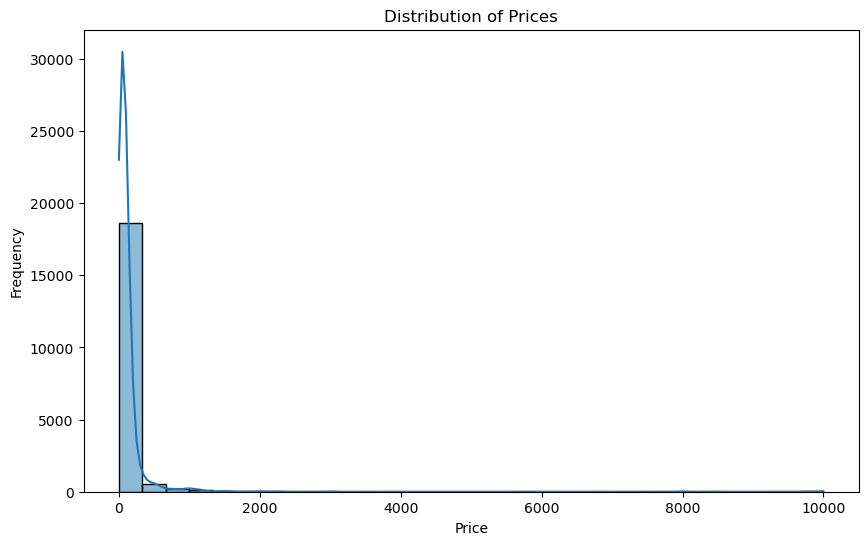

In [2]:
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# # from scipy.stats import randint
# from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
# import numpy as np
import seaborn as sns
from proprocessor import preprocess_train_evaluate
from random_forest_regressor import random_forest_regressor


# Function to preprocess data, train and evaluate the model

    
preprocessor, X, y = preprocess_train_evaluate(madrid_df)

# Splitting the dataset
# X = df.drop('price', axis=1)
# y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rmse, mae = random_forest_regressor(X_train, X_test, y_train, y_test, preprocessor)


print(f'RMSE: {rmse}, MAE: {mae}')

# Plot of Data
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()


# Cross-validation
# cv_scores = cross_val_score(rf_pipeline, X, y, 
#                             cv=5, scoring='neg_mean_squared_error')
# cv_rmse = np.sqrt(np.abs(cv_scores))
# print(f'Cross-validation RMSE: {cv_rmse}')


# # Hyperparameter tuning
# param_grid = {
#     'preprocessor__num__imputer__strategy': ['mean', 'median'],
#     'regressor__n_estimators': [50, 100, 150, 200],
#     'regressor__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
# }

# grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# print(f'Best params: {grid_search.best_params_}')


# # Randomized search
# param_dist = {
#     'preprocessor__num__imputer__strategy': ['mean', 'median'],
#     'regressor__n_estimators': [50, 100, 150, 200],
#     'regressor__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
# }

# random_search = RandomizedSearchCV(rf_pipeline, param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error')
# random_search.fit(X_train, y_train)
# print(f'Best params: {random_search.best_params_}')

# K-Fold Cross Validation
# kf = KFold(n_splits=5)
# cv_rmse = []
# for train_index, test_index in kf.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     rf_pipeline.fit(X_train, y_train)
#     y_pred = rf_pipeline.predict(X_test)
#     rmse = mean_squared_error(y_test, y_pred, squared=False)
#     cv_rmse.append(rmse)

# print(f'Cross-validation RMSE: {cv_rmse}')



# return rmse, mae

# Running the process for each dataset
# results = {}
# results['Madrid'] = preprocess_train_evaluate(madrid_df)
# results['New York City'] = preprocess_train_evaluate(ny_df)
# results['Singapore'] = preprocess_train_evaluate(singapore_df)

# results
